# Lab 04: Data Science Tools

## 0. Jupyter Notebooks

Welcome to your first Jupyter notebook! Notebooks are made up of cells. Some cells contain text (like this one) and others contain Python code. 

Each cell can be in two different modes: editing or running. To edit a cell, double-click on it. When you're done editing, press **shift+Enter** to run it.  You can use [Markdown](https://www.markdownguide.org/cheat-sheet/) to add basic formatting to the text. Before you go on, try editing the text in this cell..

In [25]:
# Other cells are code cells, containing Python code. (This is a comment, of course!)
# Try running this cell (again, shift+Enter). You'll see the result of the final statement 
# printed below the cell. 
# Then try changing the Python code and re-run it.

1+1+1

3

### 0.1 Cells share state

Even though code cells run one at a time, anything that happens in a cell (like declaring a variable or running a function) affects the whole notebook. Try running these two cells a few times, in different orders. What happens when you run *Cell B* over and over?

In [26]:
# Cell A
x = 10
x

10

In [27]:
# Cell B
x = x * 2
x

20

### 0.2 Saving your work

When you finish working on a notebook, save your work using the icon in the menu bar above. Your notebook is stored in the file `lab_04.ipynb` in the lab directory. You can commit your changes to `ipynb` files just like any other file. Once you finish with Jupyter, you can stop the server by pressing **Control + C** in the Terminal. 

*If you're doing this lab on a cloud-based platform like Binder, then you can't save your work. So don't close the tab!*

---

## 1. Pandas

Pandas is probably the most important Python library for data science. Pandas provides an object called a **DataFrame**, which is basically a table with rows and columns. Most of the time, you will load data into Pandas using a `.csv` file. CSV files can be exported from Excel or Google Sheets, and are a common format for public data sets. 

In this lab, we'll be working with two data sets: The first contains Pokémon characteristics and the second comes from a wide-scale survey conducted by the US Centers for Disease Control ([details](https://www.cdc.gov/brfss/annual_data/annual_2020.html)). We will demonstrate techniques with Pokémon; your job is to replicate these tasks with the CDC dataset. 

**Note:** Pandas has *extensive* capabilities, and there's no way we could possibly present them all here. If you have a clearly-formed idea of what you want to do with tabular data, there's a way to do it. This lab introduces *some* of what Pandas can do, but expect to spend time reading the documentation and Stack Overflow when you start working on new tasks. 

### 1.0 Getting started

First, we'll import pandas (using the conventional variable name `pd`) and load the two datasets. *Run these cells and every code cell you encounter in this notebook.*

In [28]:
import pandas as pd

In [29]:
pokemon = pd.read_csv("pokemon.csv")
people = pd.read_csv("brfss_2020.csv")

### 1.1 A first look

#### Demo

Let's start by learning the *shape* of the data. How many columns are there? How many rows? What kinds of data are included?

In [30]:
pokemon

,name,type,subtype,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


OK, 800 Pokémon, with 12 columns for each. And you can see all the columns. Not all the data is shown in this preview, of course. If there were more columns than could be displayed, you could see them all by typing `pokemon.columns`. 

#### Your turn

Now do the same for your data set, `people`.

In [31]:
people

,age,sex,income,education,sexual_orientation,height,weight,health,no_doctor,exercise,sleep
0,55,female,5,2,other,1.55,83.01,2,True,True,7
1,65,female,8,1,heterosexual,1.65,78.02,3,False,False,8
2,35,female,8,4,heterosexual,1.65,77.11,4,True,True,7
3,55,male,8,4,heterosexual,1.83,81.65,5,False,True,8
4,55,female,8,4,heterosexual,1.80,76.66,4,False,True,8
...,...,...,...,...,...,...,...,...,...,...,...
166420,45,female,8,3,heterosexual,1.63,86.18,1,False,False,6
166421,25,male,7,2,heterosexual,1.78,86.18,4,False,True,6
166422,25,female,1,2,heterosexual,1.91,45.36,1,False,False,8
166423,35,female,5,4,heterosexual,1.60,68.04,4,True,True,6


### 1.2 Descriptive Statistics

#### Demo

Let's get a sense of the data contained in some of the columns. For categorical data like `generation`, it makes sense to look at value counts--showing us how many of each category there are. You can use the optional keyword `normalize=True` to see percentage of total instead of frequencies. 

In [32]:
pokemon.generation.value_counts()

generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

For numeric data, we could start by looking at the mean value. We can select multiple columns and get all the column means at once.

In [33]:
pokemon[["hp", "attack", "defense", "speed"]].mean()

hp         69.25875
attack     79.00125
defense    73.84250
speed      68.27750
dtype: float64

We can also compute the mean of boolean data. In this case, True will map to 1 and False will map to 0. So the mean value equals the percentage of data which is True. 

In [34]:
pokemon.legendary.mean()

0.08125

Just over 8% of Pokemon are legendary.

#### Your turn

**1.2.0.** In this survey, people are grouped into age bands of 18-24, 25-34, 35-44, 45-54, 55-64, and 65+, with the lower bound reported. What percentage of people are in each age band? (When we talk about "people" in this lab, we're referring to the people who responded to the survey, not the whole US population.)

In [35]:
people.age.value_counts(normalize=True)*100

age
65    33.632567
55    20.636924
45    15.766862
35    13.552651
25    10.886586
18     5.524410
Name: proportion, dtype: float64

**1.2.1.** What are the mean height and weight of people in this survey?

In [36]:
height = people.height.mean
weight = people.weight.mean
print(height, weight)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         1.55
1         1.65
2         1.65
3         1.83
4         1.80
          ... 
166420    1.63
166421    1.78
166422    1.91
166423    1.60
166424    1.75
Name: height, Length: 166425, dtype: float64> <bound method NDFrame._add_numeric_operations.<locals>.mean of 0         83.01
1         78.02
2         77.11
3         81.65
4         76.66
          ...  
166420    86.18
166421    86.18
166422    45.36
166423    68.04
166424    86.18
Name: weight, Length: 166425, dtype: float64>


In [37]:
exercise = round(people.exercise.mean() * 100, 2)
print(str(exercise) + " percent of participants exercised")

78.58 percent of participants exercised


### 1.3 Filtering

Sometimes we're just interested in a selection of the data set. The way to do this is to create a boolean series, and then use this to select which rows you want to include. Vocabulary note: A dataframe is two-dimensional, with rows and columns. A series (a single row or a single column) is one-dimensional. 

#### Demo
`pokemon.legendary` is already boolean, so we can use this to select just the legendary pokémon. 

In [38]:
legendary = pokemon[pokemon.legendary]
legendary

,name,type,subtype,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Let's get all the ice pokémon. We can create a boolean series from another series...

In [39]:
pokemon.type == "Ice"

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: type, Length: 800, dtype: bool

And then use this series to select just the ice pokémon. 

In [40]:
ice = pokemon[pokemon.type == "Ice"]
ice

,name,type,subtype,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
133,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
238,Swinub,Ice,Ground,250,50,50,40,30,30,50,2,False
239,Piloswine,Ice,Ground,450,100,100,80,60,60,50,2,False
243,Delibird,Ice,Flying,330,45,55,45,65,45,75,2,False
257,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
395,Snorunt,Ice,NaN,300,50,50,50,50,50,50,3,False
396,Glalie,Ice,NaN,480,80,80,80,80,80,80,3,False
397,GlalieMega Glalie,Ice,NaN,580,80,120,80,120,80,100,3,False
398,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False


Let's get the high-speed ice pokémon. You can join conditions together using the `&` (and) and `|` (or) operators. `~` means "not", so `pokemon[~(pokemon.type == "Ice")]` would select all the non-ice pokémon. Due to order of operations, each condition needs to be wrapped in parentheses.

In [41]:
high_speed_ice = pokemon[(pokemon.type == "Ice") & (pokemon.speed >= 80)]
high_speed_ice

,name,type,subtype,total,hp,attack,defense,special_attack,special_defense,speed,generation,legendary
133,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
396,Glalie,Ice,NaN,480,80,80,80,80,80,80,3,False
397,GlalieMega Glalie,Ice,NaN,580,80,120,80,120,80,100,3,False
524,Mamoswine,Ice,Ground,530,110,130,80,70,60,80,4,False
530,Froslass,Ice,Ghost,480,70,80,70,80,70,110,4,False
676,Cryogonal,Ice,NaN,485,70,50,30,95,135,105,5,False


You could get the pokémon who are fire or ice by selecting `pokemon[(pokemon.type == "Fire") | (pokemon.type == "Ice")]`.

#### Your turn

**1.3.0.** `no_doctor` indicates whether there was a time in the last year when the person needed to see a doctor, but could not afford to do so. Create a dataframe containing only these people. 

In [42]:
no_doctor = people[people.no_doctor == False]
no_doctor

,age,sex,income,education,sexual_orientation,height,weight,health,no_doctor,exercise,sleep
1,65,female,8,1,heterosexual,1.65,78.02,3,False,False,8
3,55,male,8,4,heterosexual,1.83,81.65,5,False,True,8
4,55,female,8,4,heterosexual,1.80,76.66,4,False,True,8
5,55,male,8,4,heterosexual,1.80,74.84,5,False,True,7
6,65,female,5,4,other,1.63,90.72,3,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...
166419,45,female,8,2,heterosexual,1.52,68.04,3,False,True,7
166420,45,female,8,3,heterosexual,1.63,86.18,1,False,False,6
166421,25,male,7,2,heterosexual,1.78,86.18,4,False,True,6
166422,25,female,1,2,heterosexual,1.91,45.36,1,False,False,8


**1.3.1.** `health` asks people for their general health, with the meanings of numbers shown below. Create a dataframe which contains people whose general health is good or better. 

| number | health status | 
| ------ | ----------- |
| 1      | Poor        |
| 2      | Fair        |
| 3      | Good        |
| 4      | Very good   |
| 5      | Excellent   |

In [43]:
good_health = people[(people.health == 3) | (people.health == 4) | (people.health == 5)]
good_health

,age,sex,income,education,sexual_orientation,height,weight,health,no_doctor,exercise,sleep
1,65,female,8,1,heterosexual,1.65,78.02,3,False,False,8
2,35,female,8,4,heterosexual,1.65,77.11,4,True,True,7
3,55,male,8,4,heterosexual,1.83,81.65,5,False,True,8
4,55,female,8,4,heterosexual,1.80,76.66,4,False,True,8
5,55,male,8,4,heterosexual,1.80,74.84,5,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...
166418,55,male,7,2,heterosexual,1.57,63.50,3,False,True,8
166419,45,female,8,2,heterosexual,1.52,68.04,3,False,True,7
166421,25,male,7,2,heterosexual,1.78,86.18,4,False,True,6
166423,35,female,5,4,heterosexual,1.60,68.04,4,True,True,6


**1.3.2.**. `education` indicates the highest level of education completed, with codes as follows. Create a dataframe which only contains female college graduates who needed a doctor but couldn't afford one. (The survey asked people for their current sex, and only had options for male and female.)

| number | education level      | 
| ------ | ----------- |
| 1      | Did not graduate from high school        |
| 2      | Graduated from high school        |
| 3      | Attended some college        |
| 4      | Graduated from college   |

In [44]:
educated_female_nodocs = people[(people.no_doctor == False) & (people.education == 4) & (people.sex == "female")]
educated_female_nodocs

,age,sex,income,education,sexual_orientation,height,weight,health,no_doctor,exercise,sleep
4,55,female,8,4,heterosexual,1.80,76.66,4,False,True,8
6,65,female,5,4,other,1.63,90.72,3,False,True,7
8,55,female,6,4,heterosexual,1.73,63.50,5,False,True,7
9,45,female,8,4,heterosexual,1.68,124.74,2,False,False,6
10,55,female,7,4,other,1.55,76.66,4,False,True,6
...,...,...,...,...,...,...,...,...,...,...,...
166393,25,female,7,4,heterosexual,1.73,61.69,5,False,True,7
166397,65,female,8,4,heterosexual,1.57,66.68,5,False,True,8
166398,55,female,7,4,heterosexual,1.40,63.50,3,False,False,5
166402,65,female,6,4,other,1.55,58.97,5,False,True,7


### 1.4. Grouping

Now things get crazy. You can group a dataframe using one or more columns, and then compare their statistics. 

#### Demo

Do different types of pokémon move at different speeds? We'll use `sort_values` to put these in order from slow to fast.

In [45]:
pokemon.groupby("type").speed.mean().sort_values()

type
Fairy        48.588235
Steel        55.259259
Rock         55.909091
Bug          61.681159
Grass        61.928571
Ice          63.458333
Poison       63.571429
Ground       63.906250
Ghost        64.343750
Water        65.964286
Fighting     66.074074
Normal       71.551020
Fire         74.442308
Dark         76.161290
Psychic      81.491228
Dragon       83.031250
Electric     84.500000
Flying      102.500000
Name: speed, dtype: float64

Do types differ in other stats? Let's sort by hit points. 

In [46]:
ptypes = pokemon.groupby("type")
ptypes[["hp", "attack", "defense"]].mean().sort_values("hp")

,hp,attack,defense
type,,,
Bug,56.884058,70.971014,70.724638
Electric,59.795455,69.090909,66.295455
Ghost,64.437500,73.781250,81.187500
Steel,65.222222,92.703704,126.370370
Rock,65.363636,92.863636,100.795455
Dark,66.806452,88.387097,70.225806
Poison,67.250000,74.678571,68.821429
Grass,67.271429,73.214286,70.800000
Fighting,69.851852,96.777778,65.925926


Which type/subtype combinations are most likely to have legendary pokémon?

In [47]:
legendary_percentages = pokemon.groupby(["type", "subtype"]).legendary.mean().sort_values() 
legendary_percentages[legendary_percentages > 0.5]

type      subtype 
Electric  Flying      0.600000
Rock      Fairy       0.666667
Psychic   Ghost       1.000000
Ground    Fire        1.000000
Ghost     Dragon      1.000000
Fire      Water       1.000000
          Steel       1.000000
Psychic   Dark        1.000000
          Fire        1.000000
Steel     Dragon      1.000000
Rock      Fighting    1.000000
Dragon    Psychic     1.000000
          Ice         1.000000
          Fire        1.000000
Steel     Fighting    1.000000
Dragon    Electric    1.000000
Name: legendary, dtype: float64

#### Your turn

**1.4.0.** `income` records peoples' annual income, in the following bands. `sleep` records the average hours of sleep someone gets per night. Is there a difference in the average hours of sleep by income level?

| number | annual income, in $1000   | 
| ------ | ----------- |
| 1      | Less than 10       |
| 2      | 10-15        |
| 3      | 15-20         |
| 4      | 20-25        |
| 5      | 25-35        |
| 6      | 35-50        |
| 7      | 50-75        |
| 8      | More than 75   |

In [48]:
income_and_sleep = people.groupby("income")
income_and_sleep[["sleep"]].mean().sort_values("income")

,sleep
income,
1,6.952208
2,6.985627
3,7.083274
4,7.079627
5,7.100286
6,7.055784
7,7.078495
8,7.074626


**1.4.0.** Is there a difference in peoples' income or general health, by sex and education level? 

In [49]:
people_sex_ed = people.groupby(['sex', 'education'])[['income', 'health']].mean()
people_sex_ed

income    health
sex    education                    
female 1          3.554701  2.848040
       2          5.049022  3.315797
       3          5.779390  3.483379
       4          6.960652  3.844340
male   1          4.433009  3.031525
       2          5.742876  3.440818
       3          6.270230  3.549105
       4          7.190582  3.826512

### 1.5. Plotting 

Pandas has excellent built-in plotting capabilities, but 
we are going to use the [seaborn](https://seaborn.pydata.org/) library because it's a bit 
more intuitive and produces more beautiful plots. `set_theme`, called here without any arguments, assigns the default color palette. 

In [50]:
import seaborn as sns
sns.set_theme()

#### Demo

**When you want to visualize the distribution of a series**, a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) puts data into bins and plots the number of data points in each bin.

Let's see the distribution of pokémon attack values. Note how assigning `x="attack"` spreads attack values over the x-axis, while `y="attack"` spreads attack values over the y-axis. The number of bins is selected automatically, but you can specify this with the optional `bins` argument. 

<Axes: xlabel='attack', ylabel='Count'>

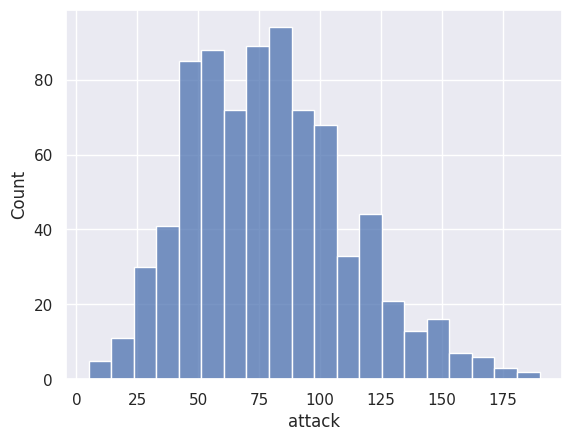

In [51]:
sns.histplot(data=pokemon, x="attack")

<Axes: xlabel='Count', ylabel='attack'>

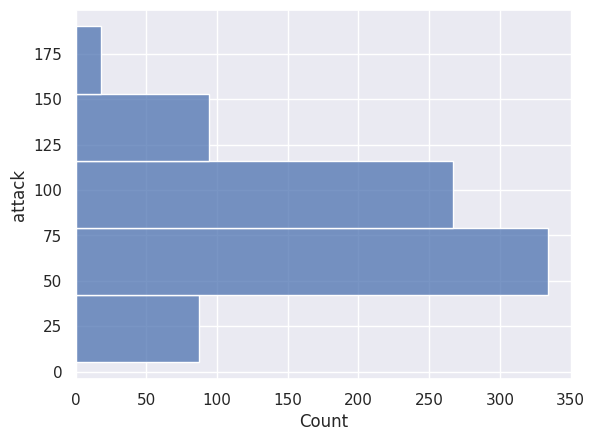

In [52]:
sns.histplot(data=pokemon, y="attack", bins=5)

**When you want to compare the distribution of a numeric variable across categories**, a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) is a good choice. Choose one numeric column and one categorical column. 

Let's see pokémon hit points by legendary/non-legendary. `ci="sd"` shows the standard deviation for each category. 

<Axes: xlabel='legendary', ylabel='hp'>

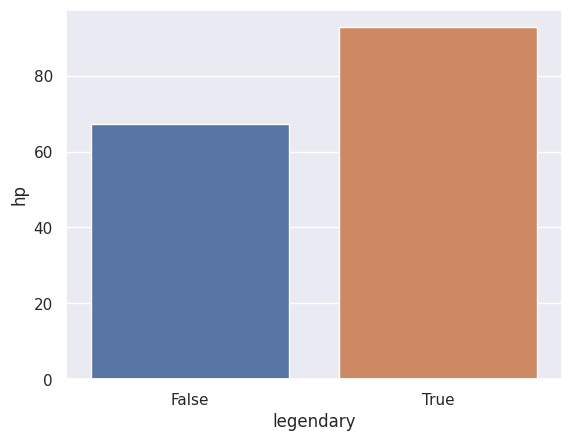

In [53]:
sns.barplot(data=pokemon, x="legendary", y="hp", errorbar=None)

Here, we use a barplot to show average hit points by type. `ci=None` removes the standard deviation bars, because they clutter up the plot with too much detail. 

<Axes: xlabel='hp', ylabel='type'>

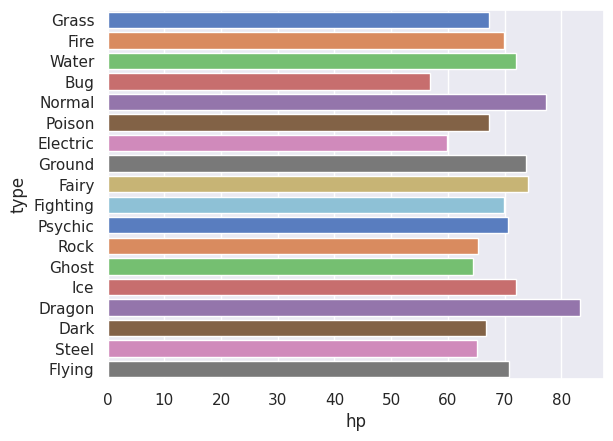

In [54]:
sns.barplot(data=pokemon, x="hp", y="type", errorbar=None, palette="muted")

**When you want to show how many observations are the intersection of multiple categories,** a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) is a good choice. 

To demonstrate this, let's convert the numeric variable `speed` into a categorical variable, `speed_category`, using the built-in function [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). 

In [55]:
bins = [0, 50, 100, 200]
labels = ["slow", "medium", "fast"]
pokemon["speed_category"] = pd.cut(pokemon.speed, bins=bins, labels=labels)

<Axes: xlabel='speed_category', ylabel='count'>

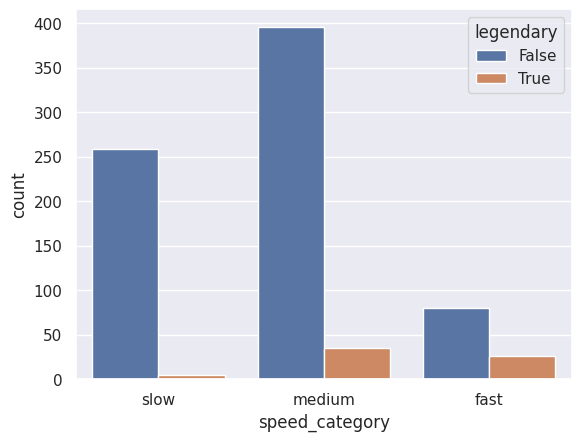

In [56]:
sns.countplot(data=pokemon, x="speed_category", hue="legendary")

**When you want to show the relationship between two numeric variables**, a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) is a good choice. 

Here, we plot pokémon hit points against their speed. 

<Axes: xlabel='hp', ylabel='speed'>

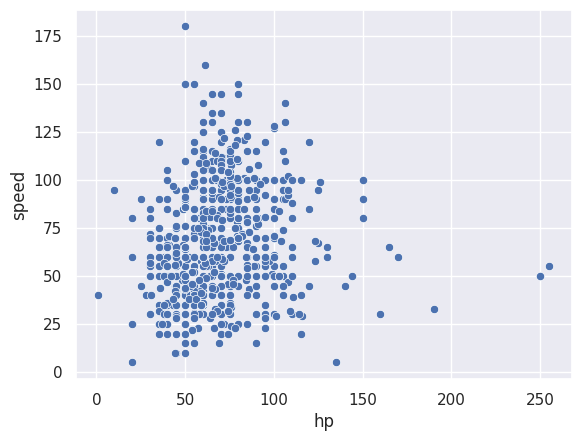

In [57]:
sns.scatterplot(data=pokemon, x="hp", y="speed")

You can distinguish between categories within a scatter plot by assigning a categorical variable to `hue`. We set the marker size with `s` and their opacity with `alpha`. 

<Axes: xlabel='hp', ylabel='speed'>

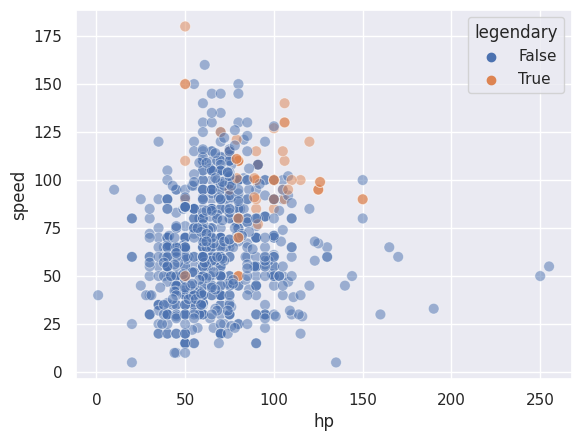

In [58]:
sns.scatterplot(data=pokemon, x="hp", y="speed", hue="legendary", alpha=0.5, s=60)

Finally, if you want scatter plots across multiple categories, a [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) lets you distribute categories across rows and colums in a grid. 

/home/cooperl/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


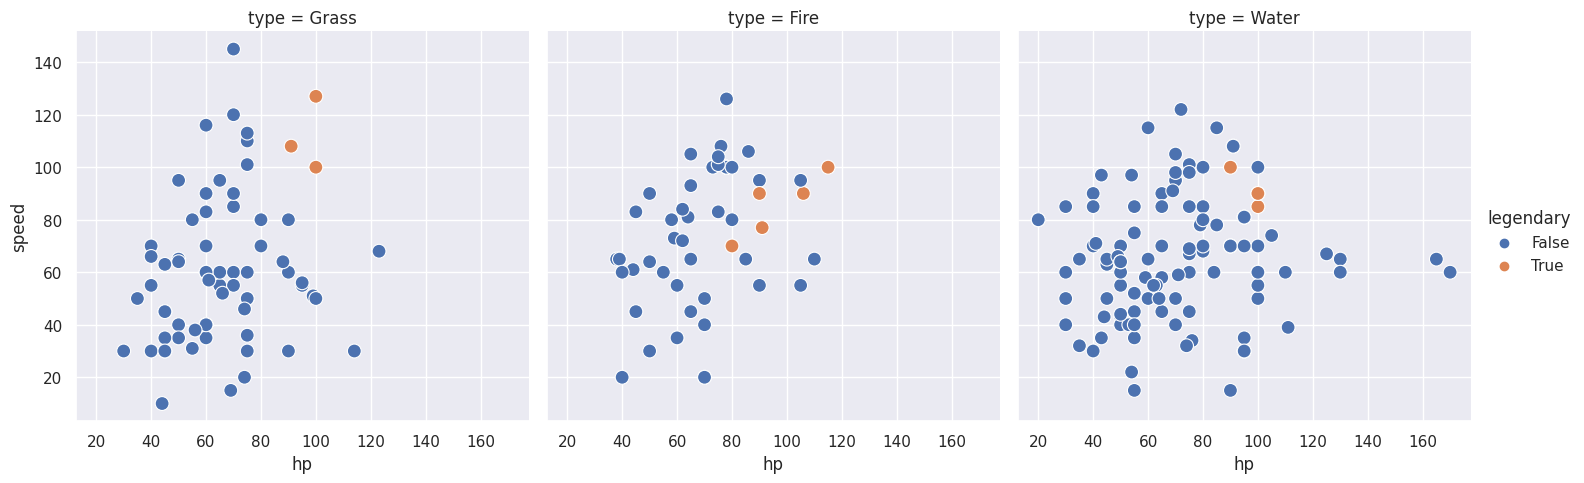

In [21]:
favorite_types = pokemon[pokemon.type.isin(["Fire", "Water", "Grass"])]
sns.relplot(data=favorite_types, x="hp", y="speed", hue="legendary", col="type", s=100)

#### Your turn

**1.5.0.** Plot a histogram of peoples' heights.

<Axes: xlabel='height', ylabel='Count'>

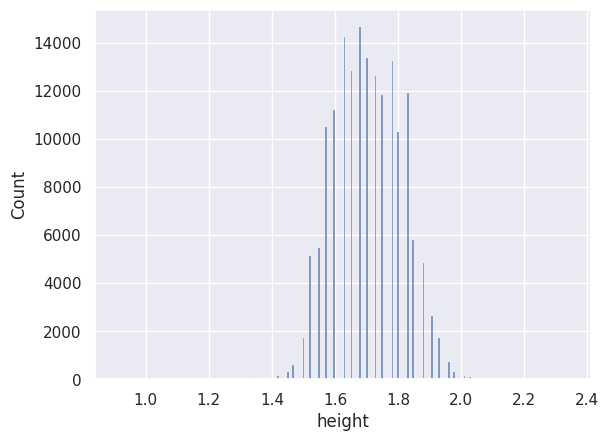

In [235]:
sns.histplot(data=people, x="height")

**1.5.1.** Plot a bar chart showing peoples' average hours of sleep by age. 

<Axes: xlabel='age', ylabel='sleep'>

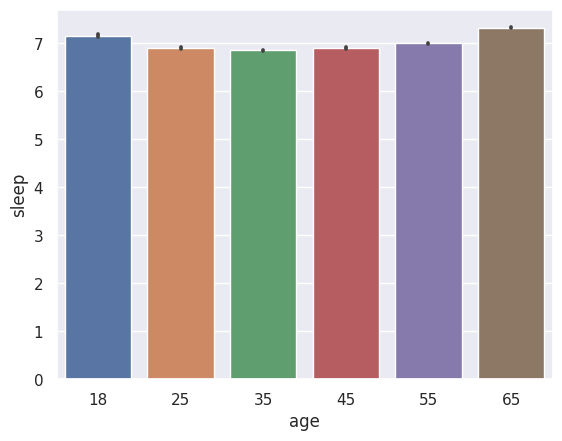

In [238]:
sns.barplot(data=people, x="age", y="sleep")

**1.5.2.** Plot a bar chart showing peoples' likelihood of getting exercise by income. 

<Axes: xlabel='income', ylabel='exercise'>

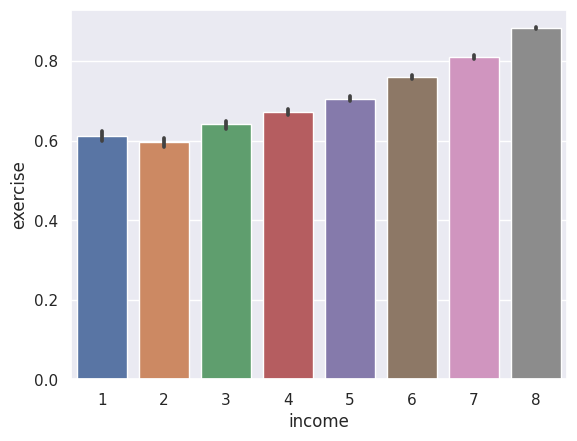

In [239]:
sns.barplot(data=people, x="income", y="exercise")

**1.5.3.** Plot a bar chart showing average reported health by age. For each age, show average health for those who get exercise and those who don't.

<Axes: xlabel='age', ylabel='health'>

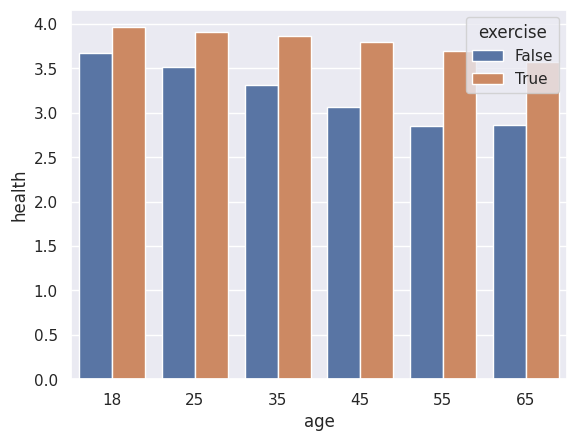

In [15]:
sns.barplot(data=people, y="health", x="age", hue="exercise", errorbar=None)

**1.5.4.** Create a plot showing the number of people at each income level, for each education level. 

<Axes: xlabel='income', ylabel='education'>

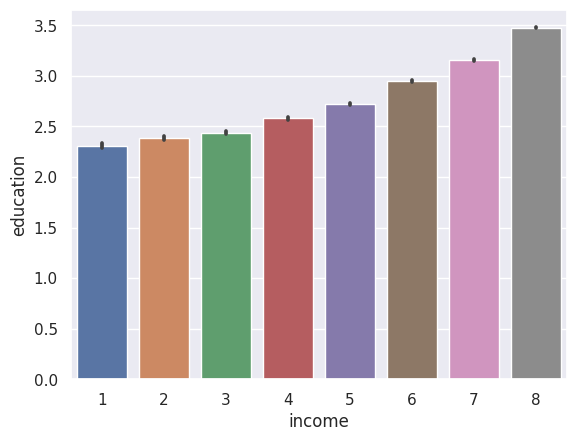

In [277]:
sns.barplot(data=people, x="income", y="education")

**1.5.5.** Plot side-by-side scatter plots showing the relationship between height and weight for males and females. (There are so many overlapping dots that the plot will be more informative if you lower the opacity of each dot. Try using `alpha=0.1` and `edgecolor=None`.)

/home/cooperl/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


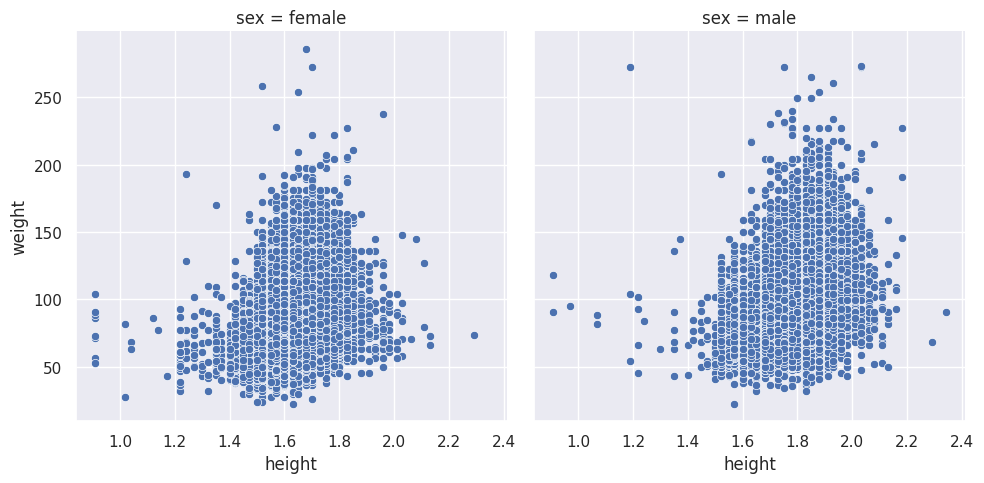

In [60]:
sns.relplot(data=people, x="height", y="weight", col="sex")

## 2. Crafting a data argument

Everything up to here are just tools, worthless without a clear research question and a convincing argument. Choose a research question that interests you which might be answerable using the `people` dataset. Then do your best to find the answer in the space below. This answer should include data analysis (code cells) as well as written argument (text cells) explaining what the data means and why you believe it answers your question. 

Examples of research questions might include:

- Do older people tend to have higher incomes?
- Do people who sleep at least 6 hours a night tend to report better health? 
- Is it more common for males to be bisexual than females?

**A note of caution:** this lab has given you tools for exploring associations--patterns that tend to co-occur. These tools *do not* equip you to argue that one variable causes another to change. For example: Plot 1.5.4 showed that people who are taller also tend to be heaver, with a lot of individual variation. But are people heavier *because* they are taller? Are they taller because they are heavier? Or maybe neither variable causes the other--perhaps they're both caused by something else. If you want to be able to answer questions like these, take a course on statistics.

___
 #### Do older people tend to have higher incomes? We will explore the possible correlation between income and age.


First lets look at the amount of people in the lower income band (1) and the highest income band (8).

In [65]:
people.income.value_counts()

income
8    64924
7    27798
6    22874
5    15755
4    13287
3     9883
2     6401
1     5503
Name: count, dtype: int64

Lets look at the distribution of ages in the data.

In [66]:
people.age.value_counts()

age
65    55973
55    34345
45    26240
35    22555
25    18118
18     9194
Name: count, dtype: int64

We can see that there are more older people than younger in the study. In order to look at this relationship closer we will create a bar plot.

<Axes: xlabel='age', ylabel='income'>

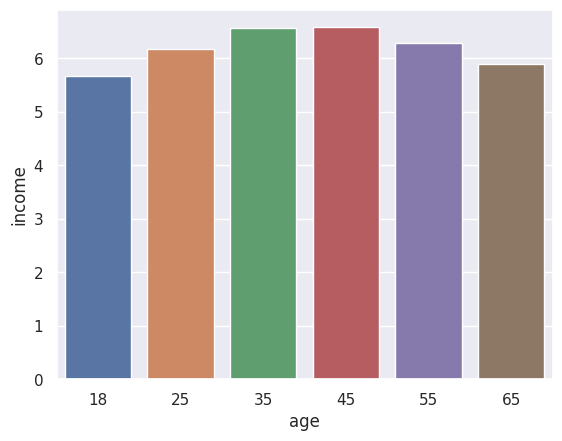

In [68]:
sns.barplot(data=people, x="age", y="income", errorbar=None)

*Summary:* It looks as though this is a standard distribution. You can see the age is not neccessary correlated with a higher income. In this data set ages 35-45 make the highest income, while the youngest and oldest ages make less, forming a bell curve shape. This data clearly shows that income and age is not a linear relationship, however this data cannot show causation. For instance we know that from ages 18-25 many people earn less and are students. We also know from ages 55-65 many people start to retire and earn less money. In order to create a more cohesive argument it may be good to look at incomes of people aged 55+ who specifically are still in the workforce.